# Describing America

Somehow, the speech delivered by country leaders when they start duties on their charge could shape the line they will follow during their term. In this activity, you will use NLTK and spaCy to analyze the inaugural addresses delivered by the Presidents from the United States since 1798.

You will use [the inaugural address corpus](https://www.nltk.org/book/ch02.html#inaugural-address-corpus) from the NLTK library to identify what were the most common adjectives used by U.S. Presidents and how these adjectives describe America.

## Initial considerations

In the `Initial imports` cell, we are importing two modules that are worth highlighting.

* The `Counter` module from the `collections` library will allow you to track how many times equivalent values are found in a list.

* The `inaugural` module from the `nltk.corpus` library provides some methods to extract information from [the inaugural address corpus](https://www.nltk.org/book/ch02.html#inaugural-address-corpus).

In [1]:
# Initial imports
import nltk
import spacy
import pandas as pd
from collections import Counter
from nltk.corpus import inaugural

%matplotlib inline

In [2]:
# Download NLTK's inaugural corpus
nltk.download("inaugural")

[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\TribThapa\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


True

In [3]:
# Load the English language model for spaCy
nlp = spacy.load("en_core_web_sm")

## Instructions

### 1. Retrieve the documents IDs and text of the U.S. presidential inaugural addresses

In [4]:
# Retrieve the IDs of inaugural addresses
all_doc_ids = inaugural.fileids()

# Put all texts from each id into a corpus
corpus = [inaugural.raw(doc) for doc in all_doc_ids]

# Print out sample doc_id & text from that id
print(all_doc_ids[0])
print(corpus[0])

1789-Washington.txt
Fellow-Citizens of the Senate and of the House of Representatives:

Among the vicissitudes incident to life no event could have filled me with greater anxieties than that of which the notification was transmitted by your order, and received on the 14th day of the present month. On the one hand, I was summoned by my Country, whose voice I can never hear but with veneration and love, from a retreat which I had chosen with the fondest predilection, and, in my flattering hopes, with an immutable decision, as the asylum of my declining years -- a retreat which was rendered every day more necessary as well as more dear to me by the addition of habit to inclination, and of frequent interruptions in my health to the gradual waste committed on it by time. On the other hand, the magnitude and difficulty of the trust to which the voice of my country called me, being sufficient to awaken in the wisest and most experienced of her citizens a distrustful scrutiny into his qualific

### 2. Retrieve the most frequent adjective from each inaugural address

In [5]:
# Helper function
def most_freq_adj(text):
    """
    This function used spaCy to get the most common adjective from each text.
    
    Args:
        text (string): The text to analyze.
        
    Returns:
        most_common_adj (list): A list containing a tuple with the most common adjective and its occurrence in the text.
    """
    
    # Tokenizes text and parse each token
    doc = nlp(text)
    
    # Creates a list with all the adjectives in the text
    adjs = [token.text.lower() for token in doc if token.pos_ == 'ADJ']
    
    # Retrieves the most frequent adjective in the `adjs` list using the Counter module
    most_common_adj = Counter(adjs).most_common(1)
    
    return most_common_adj

In [6]:
# Create a list of the most common adjective for each inaugural address
adj_per_doc = []

for i in range(len(corpus)):

    #print(corpus[i])

    adjectives_per_doc = most_freq_adj((corpus[i]))
    
    adj_per_doc.append(adjectives_per_doc)

In [7]:
# Display sample data
print(f"This is a sample data {adj_per_doc[:5]}")
print()
print(f"This is the length {len(adj_per_doc)}")

This is a sample data [[('public', 6)], [('proper', 1)], [('foreign', 8)], [('own', 6)], [('public', 14)]]

This is the length 58


In [8]:
# Display sample data from the first ten inaugural addresses
# Set DataFrame data
adj_tuples = list(zip(all_doc_ids, adj_per_doc))

inaug_addresses = pd.DataFrame(adj_tuples,
                               columns=["doc_id", "adjectives"])

inaug_addresses.head()

,doc_id,adjectives
0,1789-Washington.txt,"[(public, 6)]"
1,1793-Washington.txt,"[(proper, 1)]"
2,1797-Adams.txt,"[(foreign, 8)]"
3,1801-Jefferson.txt,"[(own, 6)]"
4,1805-Jefferson.txt,"[(public, 14)]"


### 3. Analyze adjectives over time

In [9]:
# Helper functions
def all_adj(text):
    """
    This function retrieves all the adjectives on the given text.
    
    Args:
        text (string): The text to analyze.
        
    Returns:
        adjs (list): A list with all the adjectives in the text.
    """
    
    # Tokenize the text and parse each token
    doc = nlp(text)
    
    # Create a list with all the adjectives in the text
    adjs = [token.text.lower() for token in doc if token.pos_ == 'ADJ']
    
    return adjs

# Import the word_tokenize module from NLTK
from nltk.tokenize import word_tokenize

def get_word_counts(text, word):
    """
    This function counts the occurrences of a word in a text.
    
    Args:
        text (string): The text where word counts will be analyzed.
        word (string): The word to look into the text.
        
    Returns:
        word_count (int): The counts of the word in the given text.
    """
    
    # Use the word_tokenize module from NLTK to tokenize the text
    tok = word_tokenize(text)
    
    # Create a list with all the tokens retrieved from the text
    tok = [word.lower() for word in tok]
    
    # Count the occurrences of the word in the text
    word_count = tok.count(word)
    
    return word_count

#### Use the `all_adj()` function to create a Python list `all_adjectives` containing all the adjectives in all the inaugural addresses.

In [10]:
# Create an empty list to store all the adjectives
all_adjectives = []

# Use a for-loop to retrieve all the adjectives on each inaugural address and concatenate the adjectives fetched to `all_adjectives`
for j in range(len(corpus)):

    all_adjectives_per_doc = all_adj((corpus[j]))
    
    all_adjectives.append(all_adjectives_per_doc)

In [11]:
# Print sample data
print(all_adjectives[0])
print()
print(type(all_adjectives))

['greater', '14th', 'present', 'fondest', 'flattering', 'immutable', 'necessary', 'dear', 'frequent', 'gradual', 'other', 'sufficient', 'wisest', 'experienced', 'distrustful', 'inferior', 'civil', 'conscious', 'own', 'faithful', 'just', 'much', 'grateful', 'former', 'affectionate', 'transcendent', 'fellow', 'little', 'weighty', 'untried', 'such', 'public', 'present', 'improper', 'first', 'official', 'fervent', 'human', 'essential', 'public', 'private', 'less', 'own', 'fellow', 'large', 'less', 'more', 'independent', 'important', 'united', 'tranquil', 'voluntary', 'many', 'distinct', 'most', 'pious', 'humble', 'future', 'present', 'new', 'free', 'executive', 'such', 'necessary', 'expedient', 'great', 'constitutional', 'consistent', 'congenial', 'particular', 'due', 'honorable', 'surest', 'local', 'separate', 'comprehensive', 'equal', 'great', 'national', 'pure', 'immutable', 'private', 'free', 'ardent', 'indissoluble', 'genuine', 'honest', 'magnanimous', 'solid', 'public', 'propitious',

#### Use the `most_common()` function from the `Counter` module to fetch the three most frequent adjectives used in the U.S. Presidential inaugural address. The `most_common()` function returns a Python list that you should store in a variable called `most_freq_adjectives`.

In [12]:
# Retrieve the three most frequent adjectives
import itertools
all_adjectives_collapsed = list(itertools.chain.from_iterable(all_adjectives))

most_freq_adjectives = Counter(all_adjectives_collapsed).most_common(3)

# Print the three most frequent adjectives
print(most_freq_adjectives)

[('great', 327), ('other', 264), ('own', 246)]


#### Use the `get_word_counts()` function to compute the counts of each of the three most frequent adjectives in the U.S. Presidential inaugural addresses

In [14]:
# Use list comprehensions to create a list with the counts of each top adjective in the inaugural addresses
great_counts = []
other_counts = []
own_counts = []

for k in range(len(corpus)):
    
    wc_great = get_word_counts(corpus[k], 'great')
    wc_other = get_word_counts(corpus[k], 'other')
    wc_own = get_word_counts(corpus[k], 'own')
    
    great_counts.append(wc_great)
    other_counts.append(wc_other)
    own_counts.append(wc_own)
    
print(f"Great counts sample data: {great_counts[:5]}")
print(f"Other counts sample data: {other_counts[:5]}")
print(f"Own counts sample data: {own_counts[:5]}")

Great counts sample data: [3, 0, 5, 1, 1]
Other counts sample data: [1, 0, 2, 1, 6]
Own counts sample data: [2, 0, 4, 6, 5]


#### Create a Python list `dates` to store the year when every inaugural address was delivered

In [16]:
# Create a list `dates` with the year for each inaugural address using the file IDs
dates = []

for l in range(len(all_doc_ids)):
    
    date = all_doc_ids[l][:4]
    
    dates.append(date)

# Print sample data
print(dates[:5])

['1789', '1793', '1797', '1801', '1805']


#### Create a Python list `presidents` to store the last name of each U.S. President whose inaugural address is in the `inaugural` corpus.

In [17]:
# Create a list `presidents` with the last name of each president
presidents = []

for l in range(len(all_doc_ids)):
    
    pres = all_doc_ids[l][5:-4]
    
    presidents.append(pres)

# Print sample data
print(presidents[:5])

['Washington', 'Washington', 'Adams', 'Jefferson', 'Jefferson']


#### Create a DataFrame `df_adjectives` with the Presidents last names and the adjectives counts as columns, and set the `dates` list as the index

In [18]:
# Set DataFrame data
adj_tuples = list(zip(presidents, great_counts, other_counts, own_counts))

df_adjectives = pd.DataFrame(adj_tuples,
                             columns=["President", "Great", "Other", "Own"])

df_adjectives.head()

,President,Great,Other,Own
0,Washington,3,1,2
1,Washington,0,0,0
2,Adams,5,2,4
3,Jefferson,1,1,6
4,Jefferson,1,6,5


#### Create a line plot using the `df_adjectives` DataFrame to visualize the usage of the most common adjective over time in the U.S. presidential inaugural addresses

<AxesSubplot:title={'center':'Most coomon adjective used in the U.S. Presidential Inaugural Addresses'}>

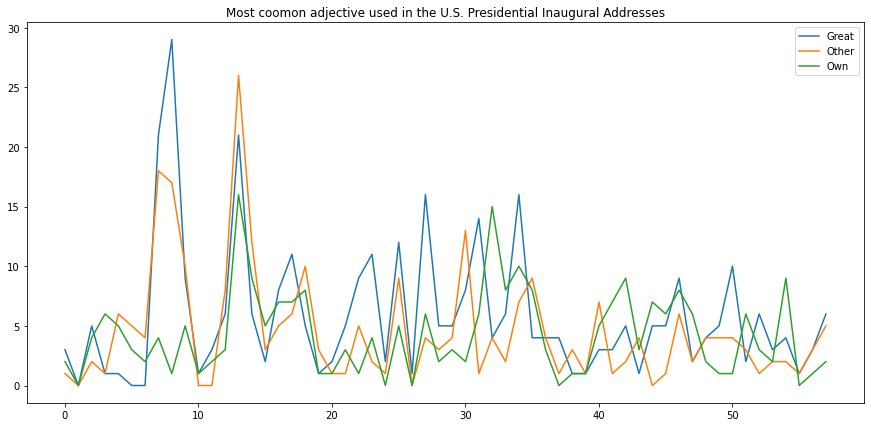

In [19]:
# Use the `df_adjectives` DataFrame to plot frequencies of each adjective over time
df_adjectives.plot(kind='line',
                   figsize=(15, 7),
                   title="Most coomon adjective used in the U.S. Presidential Inaugural Addresses")

### 4. Adjectives describing America

#### Use spaCy to create a function `describe_america()` that returns the adjectives in all the inaugural addresses that describe the word `America`

In [25]:
def describe_america(text):
    """
    This function retrieves the adjectives in the text that describe the word 'America'.
    
    Args:
        text (string): The text to analyze.
        
    Returns:
        adjs (list): A list of the adjectives that describe the word 'America' in the text.
    """
    
    # Use the spaCy English language model to tokenize the text and parse each token
    tokens = nlp(text)
        
    # Create a list with all the adjectives in the text that describe the word 'America'
    america_list = [token.text.lower() for token in tokens if token.pos_ == 'ADJ']
        
    return america_list

#### Use the `describe_america()` function you defined to create a Python list containing all the adjectives describing the word `America` into all the inaugural addresses in the corpus.

In [26]:
# Create an empty list to store the adjectives
america_adjectives = []

# Use a for-loop to retrieve all the adjectives that describe the word 'America' on each inaugural address and concatenate the adjectives fetched to `america_adjectives`
for m in range(len(corpus)):

    america_per_doc = describe_america((corpus[j]))
    
    america_adjectives.append(america_per_doc)   

In [27]:
# Print the list of the adjectives describing the word 'America'
america_adjectives[:5]

[['fellow',
  'great',
  'national',
  'many',
  'many',
  'orderly',
  'peaceful',
  'grateful',
  'gracious',
  'magnificent',
  'special',
  'long',
  'small',
  'little',
  'historic',
  'crucial',
  'great',
  'safe',
  'good',
  'reasonable',
  'righteous',
  'righteous',
  'many',
  'different',
  'inner',
  'flush',
  'young',
  'beautiful',
  'many',
  'unrealized',
  'american',
  'glorious',
  'many',
  'foreign',
  'american',
  'other',
  'sad',
  'other',
  'own',
  'other',
  'rich',
  'american',
  'middle',
  'new',
  'foreign',
  'new',
  'foreign',
  'american',
  'american',
  'other',
  'great',
  'new',
  'wonderful',
  'american',
  'american',
  'simple',
  'american',
  'good',
  'own',
  'old',
  'new',
  'civilized',
  'radical',
  'islamic',
  'total',
  'other',
  'good',
  'pleasant',
  'united',
  'unstoppable',
  'great',
  'military',
  'big',
  'bigger',
  'empty',
  'new',
  'ready',
  'new',
  'national',
  'old',
  'same',
  'red',
  'same',
  'glor